## suplots

In [72]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# plt.subplot?

### subplots, how to use them

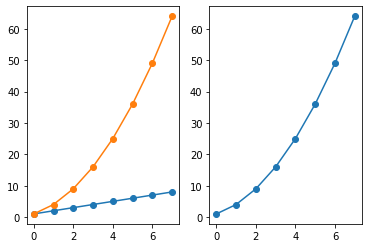

In [73]:
plt.figure()


plt.subplot(121)
linear_data = np.array([1,2,3,4,5,6,7,8])
plt.plot(linear_data, '-o')


quad_data = linear_data**2
plt.subplot(1,2,2)
plt.plot(quad_data, '-o')

plt.subplot(1,2,1)
plt.plot(quad_data, '-o')

### sharing Y axis

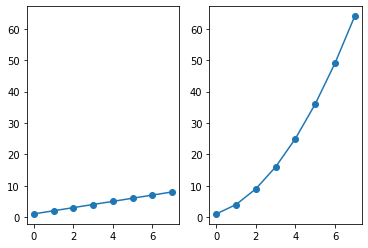

In [74]:
plt.figure()
ax1 = plt.subplot(1,2,1)
plt.plot(linear_data, '-o')

ax2 = plt.subplot(1,2,2,sharey=ax1)
plt.plot(quad_data, '-o')


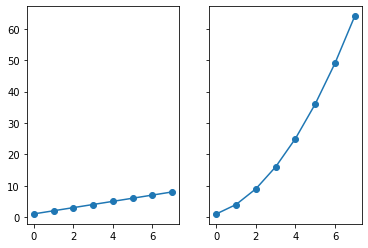

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)
ax1.plot(linear_data, '-o')
ax2.plot(quad_data, '-o')


### changing the X axis ticks

In [76]:
for ax in plt.gcf().get_axes():  # for notebook backend
    for label in ax.xticklabels() + ax.get_yticklabels():
        label.set_fontsize(16)
        label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.65))
        print(label)

<Figure size 432x288 with 0 Axes>

In [77]:
plt.gcf().canvas.draw()

<Figure size 432x288 with 0 Axes>

## Histograms

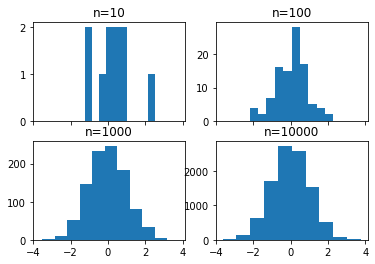

In [78]:
fig , ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

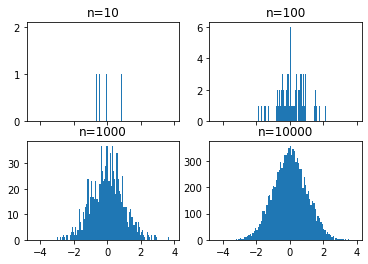

In [79]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))


## Advanced Histograms plots - 2 seprate histograms

[more here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

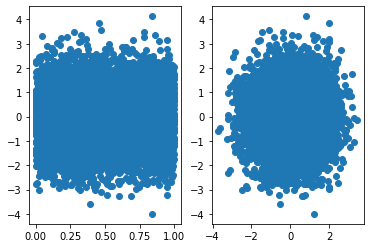

In [80]:
plt.figure()

y = np.random.normal(loc=0.0, scale=1.0, size=10000)
x1 = np.random.random(size=10000)
x2 = np.random.normal(size=10000)

plt.subplot(121)
plt.scatter(x1, y)

plt.subplot(122)
plt.scatter(x2, y)

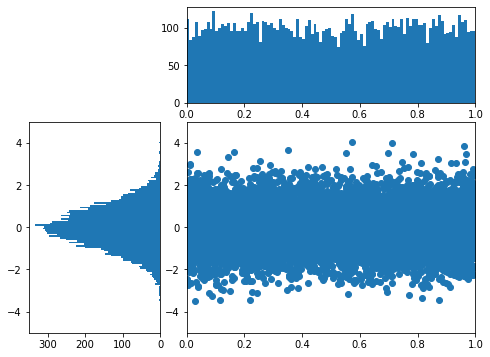

In [81]:
import matplotlib.gridspec as gridspec

plt.figure(figsize=(8,6))
gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])


y = np.random.normal(loc=0.0, scale=1.0, size=10000)
x = np.random.random(size=10000)

#* use Weight for normalizing the histogram
lower_right.scatter(x, y)
t = top_histogram.hist(x, bins=100)
s = side_histogram.hist(y, bins=100, orientation='horizontal',)
side_histogram.invert_xaxis()

for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)

for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

plt.show()

## Box and Whisker Plots

In [82]:
import pandas as pd

normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame(
    {'normal': normal_sample, 'random': random_sample, 'gamma': gamma_sample})


In [83]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,-0.001958,0.497934,2.007773
std,1.002544,0.288412,1.422729
min,-3.917532,0.000012,0.005780
25%,-0.670287,0.245964,0.964882
50%,-0.010492,0.498187,1.683335
75%,0.681189,0.743349,2.683302
max,3.732175,0.999980,13.586679


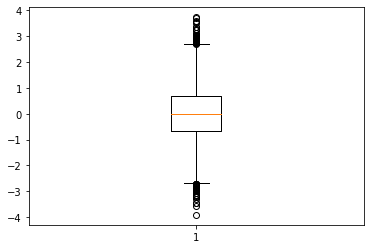

In [92]:
plt.figure ()
box = plt.boxplot(df['normal'], whis=1.5)


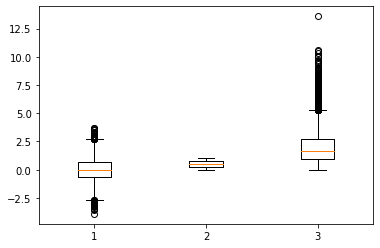

In [93]:
box = plt.boxplot([df['normal'], df['random'], df['gamma']], whis=1.5)

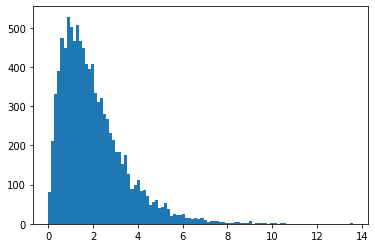

In [95]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

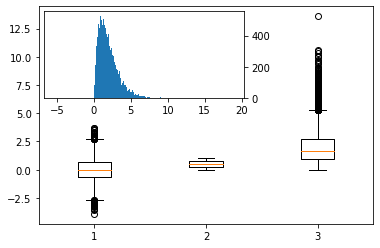

In [102]:
import mpl_toolkits.axes_grid.inset_locator as mpl_il

plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis=1.5)

ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
_ = ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

ax2.yaxis.tick_right() #* right y-axis

## HeatMaps

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

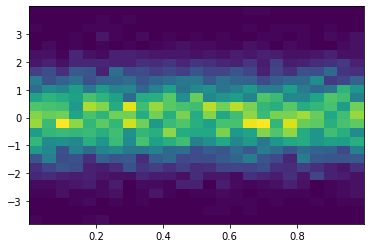

In [107]:
plt.figure()

y = np.random.normal(loc=0.0, scale=1.0, size=10000)
x = np.random.random(size=10000)
_ = plt.hist2d(x, y, bins=25)
plt.colorbar

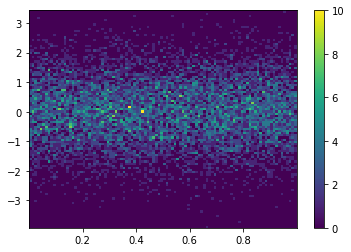

In [106]:
_ = plt.hist2d(x, y, bins=100,)
plt.colorbar()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=3, cols=2, x_title='Age', y_title='Count', row_heights=[0.4, 0.4, 0.4],
                    column_widths=[0.4, 0.4], vertical_spacing=0.1, horizontal_spacing=0.05,
                    subplot_titles=['Orginial Distribution', '', 'Median-fixed Distribution', 'Mean-fixed Distribution', 'Back-filled Distribution', 'Forward-filled Distribution'])

country = 'all'
if country == 'all':
    x1 = train['age']
else :
    x1 = train[train['country_destination'] == country]['age']
median_fixed = fill_missing_age(x1, 'median', 5)
mean_fixed = fill_missing_age(x1, 'mean', 5)
back_filled = fill_missing_age(x1, 'backfill', 5)
forward_filled = fill_missing_age(x1, 'ffill', 5)
min_range, max_range = age_cleaner(x1, 5)
x1 = x1[(x1 < max_range) & (x1 > min_range)]

Original_dist = go.Histogram(x=x1, nbinsx=120, name="Orginial Distribution")

median_fixed_dist = go.Histogram(
    x=median_fixed,  nbinsx=120, name="Median-fixed Distribution")
mean_fixed_dist = go.Histogram(
    x=mean_fixed,  nbinsx=120, name="Mean-fixed Distribution")
back_filled_fixed_dist = go.Histogram(
    x=back_filled,  nbinsx=120, name="Back-filled Distribution")
forward_filled_fixed_dist = go.Histogram(
    x=forward_filled,  nbinsx=120, name="Forward-filled Distribution")

fig.append_trace(Original_dist, 1, 1)
fig.append_trace(median_fixed_dist, 2, 1,)


# fig.append_trace(Original_dist, 1, 2)
fig.append_trace(mean_fixed_dist, 2, 2)

# fig.append_trace(Original_dist, 2, 1)
fig.append_trace(back_filled_fixed_dist, 3, 1)

# fig.append_trace(Original_dist, 2, 2)
fig.append_trace(forward_filled_fixed_dist, 3, 2)
# fig.update_layout(title_text="Age Distribution", xaxis_title="Age", yaxis_title="Count")
fig.update_traces(opacity=0.65)
fig.update_layout(height=600)
fig.update_layout(title_text=f'Age distributions of {country}', title_x=0.4)
fig.update_layout(template='plotly_dark' )
fig.show()
